# Analysis for Batch Size of 200

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [2]:
models = {
    'Multinomial Naive Bayes' : {},
    'SGD Classifier': {},
    'Perceptron': {},
    'Multi Layer Perceptron': {},
    'Clustering' : {}
}

In [3]:
for model in models:
    models[model]['Final_Test'] = pd.read_csv(f'Logs-200/{model}/TestLogs/logs.csv')
    models[model]['Train'] = pd.read_csv(f'Logs-200/{model}/TrainLogs/logs.csv', index_col = (0))

In [4]:
for model in models:
    print(f'{model}: Accuracy = ', end = '')
    print(sum(models[model]['Final_Test'].Prediction == models[model]['Final_Test'].GroundTruth)/len(models[model]['Final_Test']))

Multinomial Naive Bayes: Accuracy = 0.979375
SGD Classifier: Accuracy = 0.99625
Perceptron: Accuracy = 0.9996875
Multi Layer Perceptron: Accuracy = 0.9953125
Clustering: Accuracy = 0.5884375


In [5]:
metrics = {
    'Accuracy': {},
    'Precision': {},
    'Recall': {}
}

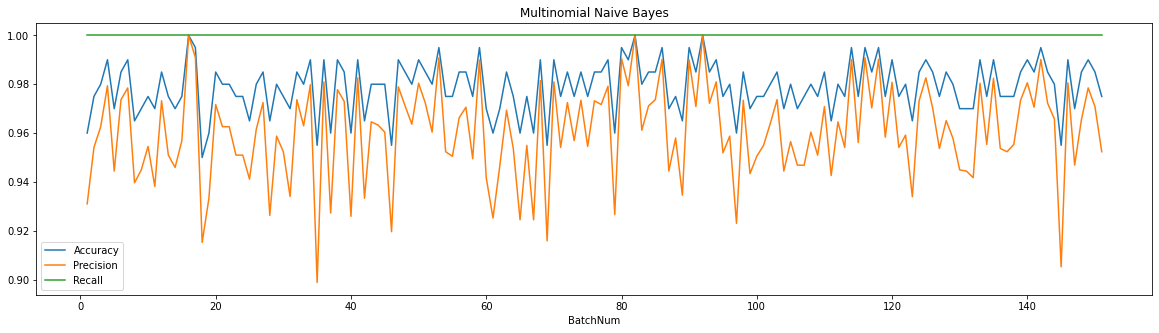

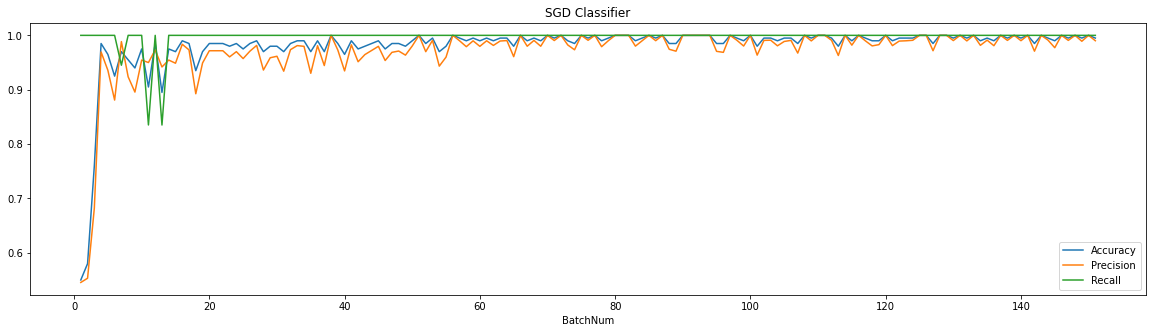

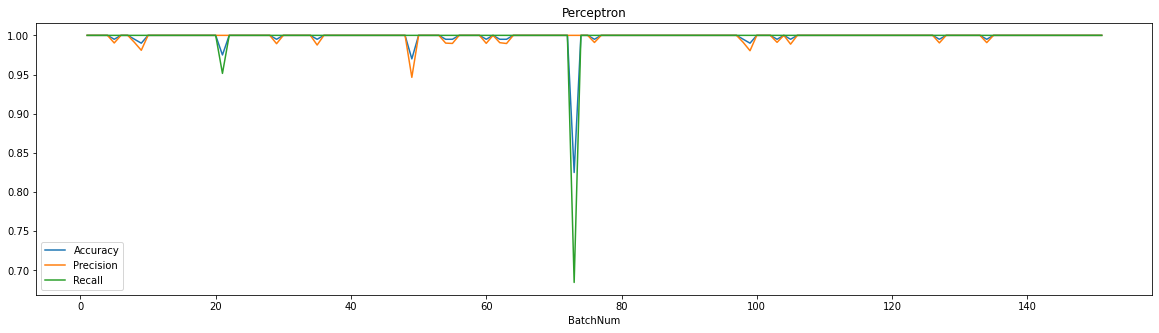

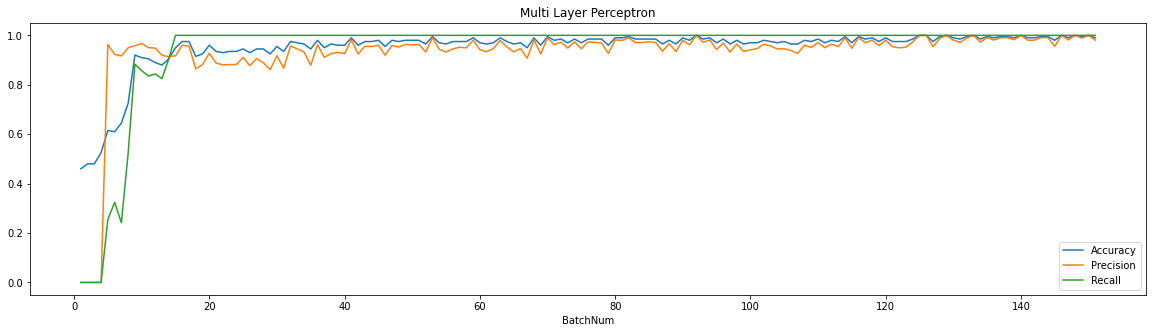

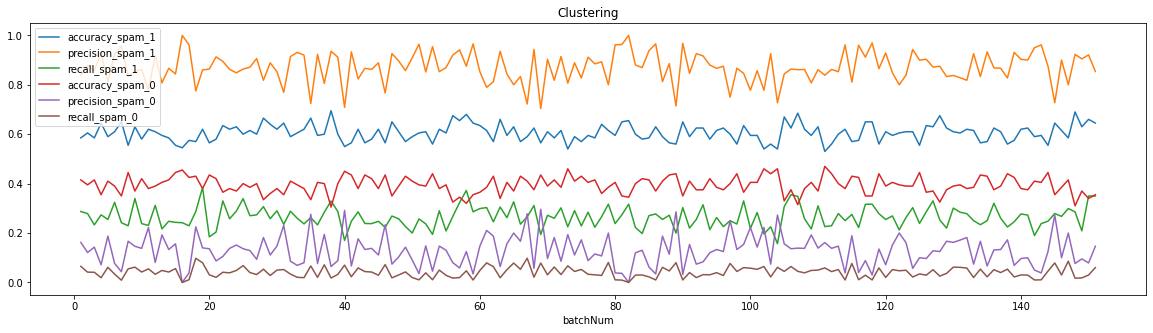

In [6]:
for model in models:
    models[model]['Train'].plot(figsize = (20, 5))
    plt.title(model)
    if model == 'Clustering': continue
    metrics['Accuracy'][model] = models[model]['Train'].Accuracy
    metrics['Precision'][model] = models[model]['Train'].Precision
    metrics['Recall'][model] = models[model]['Train'].Recall
    plt.show()

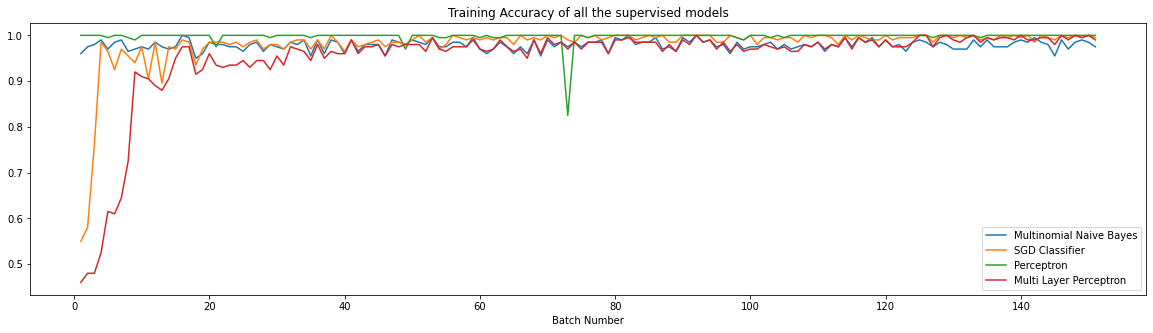

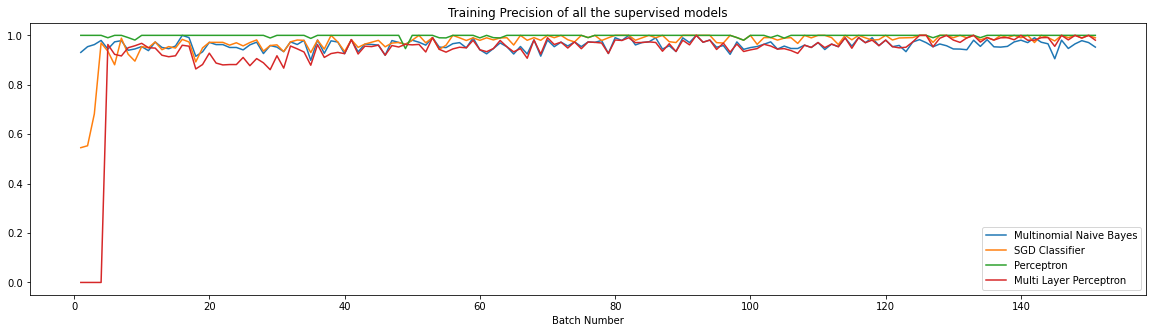

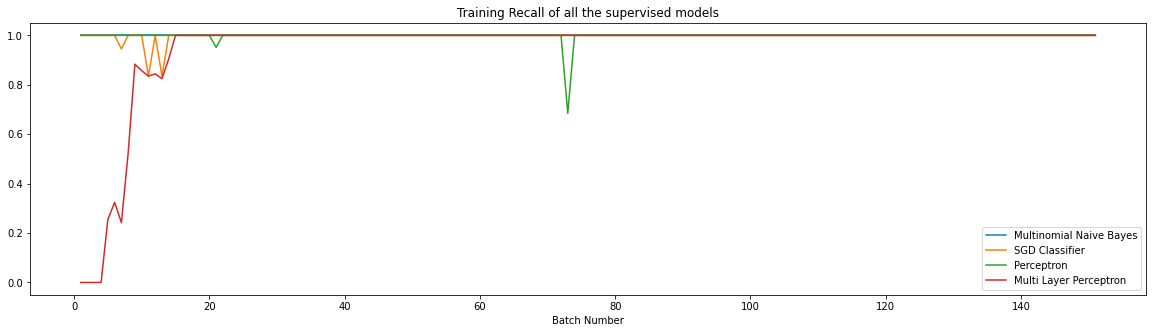

In [7]:
plt.rcParams['figure.figsize'] = (20, 5)
for metric in metrics:
    for model in metrics[metric]:
        plt.plot(list(range(1, 152)), metrics[metric][model], label = model)
        plt.title(f'Training {metric} of all the supervised models')
        plt.legend()
        plt.xlabel('Batch Number')
    plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
for model in models:
    # if model == 'Clustering': continue
    for log in os.listdir(f'Logs-200/{model}/TestLogs/'):
        name = log.split('.')[0][4:]
        if name == '': name = 151
        models[model][name] = pd.read_csv(f'Logs-200/{model}/TestLogs/{log}')
    # print(f"X = {[int(log) for log in models[model] if log not in {'Final_Test', 'Train', ''}]}")
    if model == 'Clustering':
        zipped = list(zip([int(log) for log in models[model] if log not in {'Final_Test', 'Train', 151}], 
        [ 
            sum(models[model][log].Prediction != models[model][log].GroundTruth)/len(models[model][log])
            for log in models[model] if log not in {'Final_Test', 'Train', 151}
        ]))
        zipped.sort()
        x, y = zip(*zipped)
        # print(x)
        # print(y)
        plt.plot(x, y, label = model + ' (Assuming Spam as 0)')

    zipped = list(zip([int(log) for log in models[model] if log not in {'Final_Test', 'Train', 151}], 
        [ 
            sum(models[model][log].Prediction == models[model][log].GroundTruth)/len(models[model][log])
            for log in models[model] if log not in {'Final_Test', 'Train', 151}
        ]))
    zipped.sort()
    x, y = zip(*zipped)
    # print(x)
    # print(y)
    if model == 'Clustering': plt.plot(x, y, label = model + ' (Assuming Spam as 1)')
    else: plt.plot(x, y, label = model)

plt.xlabel('Batch Number')
plt.title(f'Testing Accuracy of all the models')
plt.legend()
plt.show()

In [ ]:
for metric in ["Accuracy", "Precision", "Recall"]:
    plt.rcParams['figure.figsize'] = (20, 7)
    for model in models:
        # if model == 'Clustering': continue
        for log in os.listdir(f'Logs-200/{model}/TestLogs/'):
            name = log.split('.')[0][4:]
            if name == '': name = 303
            models[model][name] = pd.read_csv(f'Logs-200/{model}/TestLogs/{log}')
        # print(f"X = {[int(log) for log in models[model] if log not in {'Final_Test', 'Train', ''}]}")
        if model == 'Clustering':
            if(metric == "Accuracy"):
                zipped = list(zip([int(log) for log in models[model] if log not in {'Final_Test', 'Train', 303}], 
                [ 
                    accuracy_score(models[model][log].GroundTruth, [int(not(i)) for i in (models[model][log].Prediction)])
                    for log in models[model] if log not in {'Final_Test', 'Train', 303}
                ]))
            elif(metric == "Precision"):
                zipped = list(zip([int(log) for log in models[model] if log not in {'Final_Test', 'Train', 303}], 
                [ 
                    precision_score(models[model][log].GroundTruth, [int(not(i)) for i in (models[model][log].Prediction)])
                    for log in models[model] if log not in {'Final_Test', 'Train', 303}
                ]))
            elif(metric == "Recall"):
                zipped = list(zip([int(log) for log in models[model] if log not in {'Final_Test', 'Train', 303}], 
                [ 
                    recall_score(models[model][log].GroundTruth, [int(not(i)) for i in (models[model][log].Prediction)])
                    for log in models[model] if log not in {'Final_Test', 'Train', 303}
                ]))

            # zipped = list(zip([int(log) for log in models[model] if log not in {'Final_Test', 'Train', 303}], 
            # [ 
            #     # sum(models[model][log].Prediction != models[model][log].GroundTruth)/len(models[model][log])
            #     accuracy_score(models[model][log].GroundTruth, [int(not(i)) for i in (models[model][log].Prediction)])
            #     for log in models[model] if log not in {'Final_Test', 'Train', 303}
            # ]))
            zipped.sort()
            x, y = zip(*zipped)
            # print(x)
            # print(y)
            plt.plot(x, y, label = model + ' (Assuming Spam as 0)')

        if(metric == "Accuracy"):
                zipped = list(zip([int(log) for log in models[model] if log not in {'Final_Test', 'Train', 303}], 
                [ 
                    accuracy_score(models[model][log].GroundTruth, models[model][log].Prediction)
                    for log in models[model] if log not in {'Final_Test', 'Train', 303}
                ]))
        elif(metric == "Precision"):
            zipped = list(zip([int(log) for log in models[model] if log not in {'Final_Test', 'Train', 303}], 
            [ 
                precision_score(models[model][log].GroundTruth, models[model][log].Prediction)
                for log in models[model] if log not in {'Final_Test', 'Train', 303}
            ]))
        elif(metric == "Recall"):
            zipped = list(zip([int(log) for log in models[model] if log not in {'Final_Test', 'Train', 303}], 
            [ 
                recall_score(models[model][log].GroundTruth, models[model][log].Prediction)
                for log in models[model] if log not in {'Final_Test', 'Train', 303}
            ]))
        # zipped = list(zip([int(log) for log in models[model] if log not in {'Final_Test', 'Train', 303}], 
        #     [ 
        #         # sum(models[model][log].Prediction == models[model][log].GroundTruth)/len(models[model][log])
        #         accuracy_score(models[model][log].GroundTruth, models[model][log].Prediction)
        #         for log in models[model] if log not in {'Final_Test', 'Train', 303}
        #     ]))
        zipped.sort()
        x, y = zip(*zipped)
        # print(x)
        # print(y)
        if model == 'Clustering': plt.plot(x, y, label = model + ' (Assuming Spam as 1)')
        else: plt.plot(x, y, label = model)

    plt.xlabel('Batch Number')
    plt.title(f'Testing {metric} of all the models')
    plt.legend()
    plt.show()